use a binary classification problem for this purpose. The dataset chosen for this project is the Breast Cancer Wisconsin dataset.

**Dataset Description:**
*Recipes.csv* is the dataset that contains varies ingredients along with cuisines they are from. There are around 383 ingredients(features) and respective cuisine(target) such as Korea, Japan, China, Thailand and India.

In [21]:
#Importing necessiaries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve

**1.Import the dataset and read the dataset.**

In [22]:
df=pd.read_csv("Breast_Cancer_Dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**2. Data cleaning and transformation are done by observing the dataset. Example if needed according to user preference: data['diagnosis'] = data['diagnosis'].map({'malignant': 1, 'benign': 0})**

In [23]:
df.diagnosis=df.diagnosis.map({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
#Checking null values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [25]:
#Removing the null column
df.drop('Unnamed: 32',axis=1,inplace=True)

**3.Split the data into train – test segment**

In [26]:
x=df.drop(['id','diagnosis'],axis=1)
y=df['diagnosis']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

**4.Plot the distribution of the target variable.**

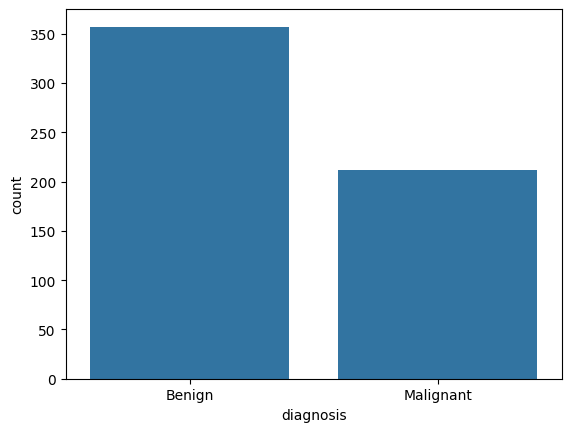

In [28]:
sns.countplot(x='diagnosis',data=df)
plt.xticks(ticks=[0,1],labels=['Benign','Malignant'])
plt.show()

**5.Build a RandomForest Classifier**

In [29]:
rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [30]:
rf_pred=rf.predict(x_test)
rf_acc=accuracy_score(rf_pred,y_test)
rf_acc

0.9649122807017544

**6.Hyperparameter Tuning using GridSearchCV.**

In [31]:
param=({'criterion':['gini','entropy'],'n_estimators':[100,150,200,300]})
rf_grid=GridSearchCV(estimator=rf, param_grid=param,cv=3,scoring='accuracy')
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='accuracy')

In [32]:
rf_grid.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [33]:
rf_grid_pred=rf_grid.predict(x_test)
rf_grid_acc=accuracy_score(rf_grid_pred,y_test)
rf_grid_acc

0.9736842105263158

**7.Evaluate the model by the following parameters: Confusion Matrix and Classification Report**

In [34]:
cm=confusion_matrix(rf_grid_pred,y_test)
cm

array([[66,  2],
       [ 1, 45]])

In [35]:
report=classification_report(rf_grid_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.96      0.98      0.97        46

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**8.Plot ROC and AUC curve. Identify False Positive Rate' and 'True Positive Rate.**

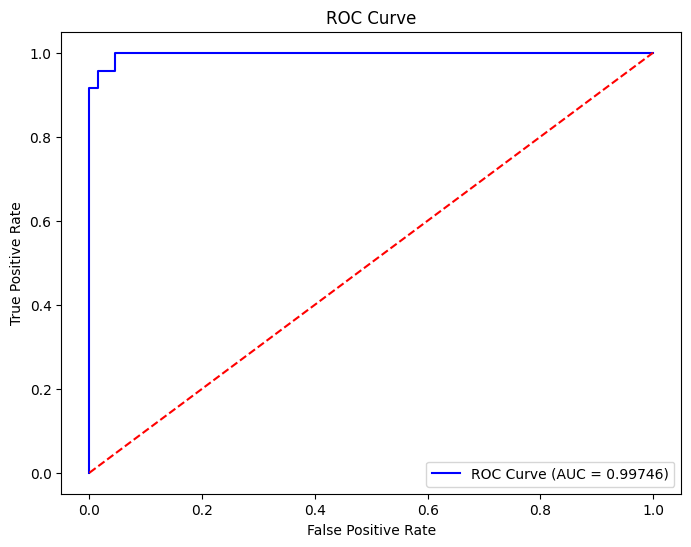

In [36]:
rf_grid_proba=rf_grid.predict_proba(x_test)

fpr,tpr,thresholds=roc_curve(y_test,rf_grid_proba[:,1])
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**9.Plot Precision-Recall Curve on predicted and test parameters**

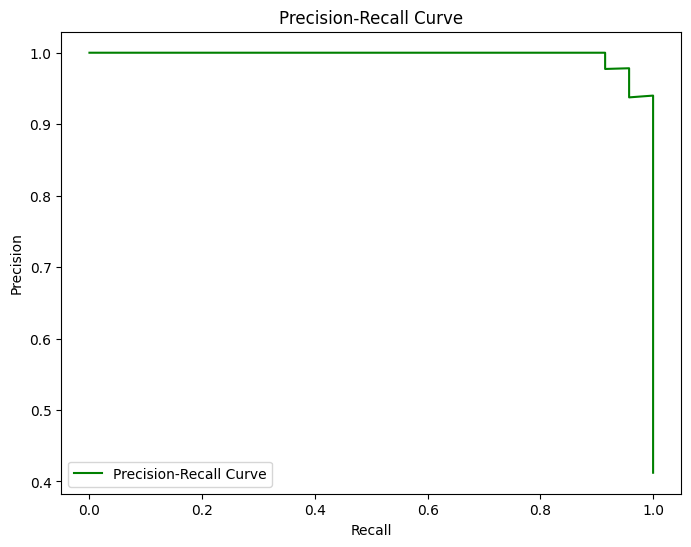

In [37]:
precision, recall, thresholds = precision_recall_curve(y_test, rf_grid_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**10.Use AdaBoost Classifier**

**11.Again, check the score utilizing Gaussian NB with AdaBoost and calculate the score again.**

In [38]:
dt=DecisionTreeClassifier(max_depth=1)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_acc=round(accuracy_score(y_test,dt_pred),3)
dt_acc

0.904

In [39]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)
gnb_acc=round(accuracy_score(y_test,gnb_pred),3)
gnb_acc

0.93

In [40]:
ab=AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
ab.fit(x_train,y_train)
ab_pred=ab.predict(x_test)
ab_acc=round(accuracy_score(y_test,ab_pred),3)
ab_acc

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.974

In [41]:
ab_gnb=AdaBoostClassifier(estimator=GaussianNB(),n_estimators=100,learning_rate=0.6)
ab_gnb.fit(x_train,y_train)
ab_gnb_pred=ab_gnb.predict(x_test)
ab_gnb_acc=round(accuracy_score(y_test,ab_gnb_pred),3)
ab_gnb_acc

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.974

**12.Visualize a chart that compares all the scores calculated with different techniques**

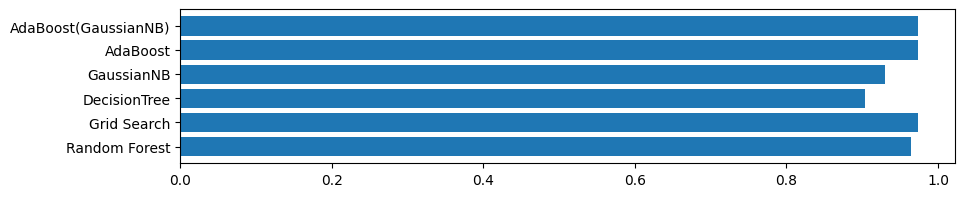

In [42]:
plt.figure(figsize=(10,2))
plt.barh(np.arange(6),[rf_acc,rf_grid_acc,dt_acc,gnb_acc,ab_acc,ab_gnb_acc],tick_label=['Random Forest','Grid Search','DecisionTree','GaussianNB','AdaBoost','AdaBoost(GaussianNB)'])
plt.show()

In [47]:
acc_df=pd.DataFrame({'Model':('Random Forest','Grid Search(Random Forest)','Decission Tree','GaussianNB','AdaBoost','AdaBoost(GaussianNB)'),
                     'Accuracy':(rf_acc,rf_grid_acc,dt_acc,gnb_acc,ab_acc,ab_gnb_acc)})
acc_df

,Model,Accuracy
0,Random Forest,0.964912
1,Grid Search(Random Forest),0.973684
2,Decission Tree,0.904000
3,GaussianNB,0.930000
4,AdaBoost,0.974000
5,AdaBoost(GaussianNB),0.974000
